# Introduction to Scikit-Learn(sklearn)

This notebook demonstrates some of the most useful functions of the beautiful Scikit-Learn library.

What we're going to cover:

0.An end-to-end Scikit-learn workflow
1.Getting the data ready
2.Choose the right estimator/algorithm and use it to make predictions on our data
3.Fit the model /algorithm amd use it to make prediction on our data
4.Evaluating a model
5.Improve a model
6.Save and load a tained model
7.Putting it all togrther!



In [1]:
import sklearn
import numpy as np

## 0.An end-to-end SCikit-Learn workflow

In [2]:
# 1.Get the data ready
import pandas as pd
heart_disease=pd.read_csv("csv/11.2 heart-disease.csv ")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
# Create X(Features matrix)
x=heart_disease.drop("target",axis=1)

# Create Y(labels)
y=heart_disease["target"]


In [4]:
import warnings
warnings.filterwarnings("ignore")

In [5]:
#  2. Choose the right model and hyperparameters
from sklearn.ensemble import RandomForestClassifier

clf=RandomForestClassifier(n_estimators=100)

# We'll keep the default hyperparameters
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [6]:
# 3.Fit the model to the training  data
from sklearn.model_selection import train_test_split 

x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.2)

In [7]:
clf.fit(x_train,y_train);

In [8]:
# Make a prediction


In [9]:
x_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
15,50,0,2,120,219,0,1,158,0,1.6,1,0,2
57,45,1,0,115,260,0,0,185,0,0.0,2,0,2
191,58,1,0,128,216,0,0,131,1,2.2,1,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,59,1,3,178,270,0,0,145,0,4.2,0,0,3
26,59,1,2,150,212,1,1,157,0,1.6,2,0,2
175,40,1,0,110,167,0,0,114,1,2.0,1,0,3
14,58,0,3,150,283,1,0,162,0,1.0,2,0,2


In [10]:
y_preds=clf.predict(x_test)
y_preds                    

array([1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1], dtype=int64)

In [11]:
y_test

8      1
2      1
15     1
57     1
191    0
      ..
101    1
26     1
175    0
14     1
62     1
Name: target, Length: 61, dtype: int64

In [12]:
# Evaluate the model on thr training data and test data

clf.score(x_train, y_train)

1.0

In [13]:
clf.score(x_test, y_test)

0.8360655737704918

In [14]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81        26
           1       0.86      0.86      0.86        35

    accuracy                           0.84        61
   macro avg       0.83      0.83      0.83        61
weighted avg       0.84      0.84      0.84        61



In [15]:
confusion_matrix(y_test,y_preds)

array([[21,  5],
       [ 5, 30]], dtype=int64)

In [16]:
accuracy_score(y_test,y_preds)

0.8360655737704918

In [17]:
# 5. Improve a model
# Try different amount of n_estimators

np.random.seed(42)
for i in range(10,100,10):
    print(f"Trying model with {i} estimators..")
    clf=RandomForestClassifier(n_estimators=i).fit(x_train, y_train)
    print(f"Model accuracy on test set: {clf.score(x_test, y_test) * 100:.2f}%")
    print("")

Trying model with 10 estimators..
Model accuracy on test set: 80.33%

Trying model with 20 estimators..
Model accuracy on test set: 86.89%

Trying model with 30 estimators..
Model accuracy on test set: 80.33%

Trying model with 40 estimators..
Model accuracy on test set: 83.61%

Trying model with 50 estimators..
Model accuracy on test set: 85.25%

Trying model with 60 estimators..
Model accuracy on test set: 83.61%

Trying model with 70 estimators..
Model accuracy on test set: 83.61%

Trying model with 80 estimators..
Model accuracy on test set: 81.97%

Trying model with 90 estimators..
Model accuracy on test set: 85.25%



In [18]:
# 6. Save a model and load it
import pickle

pickle.dump(clf, open("random_forest_model_1.pkl","wb"))

In [19]:
loaded_model=pickle.load(open("random_forest_model_1.pkl","rb"))
loaded_model.score(x_test, y_test)

0.8524590163934426

# 1.Getting our data ready to be used with machine learning

There main things we have to do:
   
   1.Split the data into feature and labels (usually `x` & `y`)
   2.Filling (also called imputing) or disregarding missing values
   3.Converting no-numerical values to numerical values (also calles feature encoding)

In [20]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [21]:
X=heart_disease.drop("target" , axis=1 )
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [22]:
Y=heart_disease["target"]
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [23]:
# Split the data into training and test sets

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test=train_test_split(X, Y, test_size=0.2)

In [24]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((242, 13), (61, 13), (242,), (61,))

In [25]:
X.shape[0] * 0.8

242.4

In [26]:
len(heart_disease)

303

In [27]:
car_sales=pd.read_csv("csv/7.1 car-sales.csv")

In [28]:
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"
4,Nissan,White,213095,4,"$3,500.00"
5,Toyota,Green,99213,4,"$4,500.00"
6,Honda,Blue,45698,4,"$7,500.00"
7,Honda,Blue,54738,4,"$7,000.00"
8,Toyota,White,60000,4,"$6,250.00"
9,Nissan,White,31600,4,"$9,700.00"


In [29]:
x=car_sales.drop("Price",axis=1)
y=car_sales["Price"]

In [30]:
#Split the data into training and test data
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2)

In [31]:
x_train.shape

(8, 4)

In [32]:
x_test.shape

(2, 4)

In [33]:
y_train.shape

(8,)

In [34]:
y_test.shape

(2,)

## 1.1 Make sure it's all numerical

In [35]:
import pandas as pd
car_sales=pd.read_csv("csv/car-sales-extended.csv")

In [36]:
car_sales.head()


,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [37]:
len(car_sales)

1000

In [38]:
car_sales.dtypes


Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [39]:
# SPlit into x/y
X=car_sales.drop("Price",axis=1)
Y=car_sales["Price"]

In [40]:
X.head()

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3


In [41]:
car_sales["Make"].value_counts()

Toyota    398
Honda     304
Nissan    198
BMW       100
Name: Make, dtype: int64

In [42]:
car_sales["Colour"].value_counts()

White    407
Blue     321
Black     99
Red       94
Green     79
Name: Colour, dtype: int64

In [43]:
car_sales["Doors"].value_counts()

4    856
5     79
3     65
Name: Doors, dtype: int64

In [44]:
Y.head()

0    15323
1    19943
2    28343
3    13434
4    14043
Name: Price, dtype: int64

In [45]:
# SPlit into training and test
X_train, X_test, Y_train, Y_test=train_test_split(X,
                                                  Y,
                                                  test_size=0.2)

In [46]:
# # Build the machine learning model
# from sklearn.ensemble import RandomForestRegressor

# model=RandomForestRegressor()
# model.fit(X_train, Y_train)
# model.score(X_test, Y_test)

In [47]:
# Convert string to numerical data

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features=["Make","Colour","Doors"]
one_hot=OneHotEncoder()
transformer=ColumnTransformer([("one_hot",
                                 one_hot,
                               categorical_features)],
                               remainder="passthrough")
transformed_X=transformer.fit_transform(X)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [48]:
pd.DataFrame(transformed_X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [49]:
dummies=pd.get_dummies(car_sales[["Make","Colour","Doors"]])
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,0,1,0,0,0,0,0,0,1
1,5,1,0,0,0,0,1,0,0,0
2,4,0,1,0,0,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,1
4,3,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
995,4,0,0,0,1,1,0,0,0,0
996,3,0,0,1,0,0,0,0,0,1
997,4,0,0,1,0,0,1,0,0,0
998,4,0,1,0,0,0,0,0,0,1


In [50]:
# # Let's refit the model
# np.random.seed(42)
# # SPlit into training and test
# X_train, X_test, Y_train, Y_test=train_test_split(transformed_X,
#                                                   Y,
#                                                   test_size=0.2)
# model.fit(X_train, Y_train)

In [51]:
# model.score(X_test, Y_test)

  ### What if there were missing values?
  
  1.Fill them with some value(also know as imputation).
  2.Remove the sample with missing data altogether.
  

In [52]:
# Import car sales missing data
car_sales_missing=pd.read_csv("csv/car-sales-extended-missing-data.csv")
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [53]:
car_sales_missing.isna().sum()  # Tell how many na values are there

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [54]:
# Create X1 & Y1
X=car_sales_missing.drop("Price",axis=1)
Y=car_sales_missing["Price"]


In [55]:
# Let's try and convert our data to numbers

# from sklearn.preprocessing import OneHotEncoder
# from sklearn.compose import ColumnTransformer

# categorical_features=["Make","Colour","Doors"]
# one_hot=OneHotEncoder()
# transformer=ColumnTransformer([("one_hot",
#                                  one_hot,
#                                categorical_features)],
#                                remainder="passthrough")
# transformed_X=transformer.fit_transform(X)
# transformed_X

##  Fill Missing data with pandas

In [56]:
# Fill the "Make" column
car_sales_missing["Make"].fillna("missing",inplace=True)

## Fill the "Colour" column
car_sales_missing["Colour"].fillna("missing", inplace=True)

## Fill the "Odometer" column
car_sales_missing["Odometer (KM)"].fillna(car_sales_missing["Odometer (KM)"].mean(), inplace=True)

# Fill the "Doors" column.
car_sales_missing["Doors"].fillna(car_sales_missing["Doors"].mean(),inplace=True)

# # Fill the "Price" column
# car_sales_missing["Price"].filna(car_sales_missing["Price"].mean(),inplace=True)




In [57]:
# Check the dataframe again
car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [58]:
# Remove rows with missing Price value
car_sales_missing.dropna(inplace=True)

In [59]:
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [60]:
len(car_sales_missing)

950

In [61]:

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features=["Make","Colour","Doors"]
one_hot=OneHotEncoder()
transformer=ColumnTransformer([("one_hot",
                                 one_hot,
                               categorical_features)],
                               remainder="passthrough")
transformed_X=transformer.fit_transform(car_sales_missing)
transformed_X

<950x17 sparse matrix of type '<class 'numpy.float64'>'
	with 4750 stored elements in Compressed Sparse Row format>

## 3 Option 2 : fill value with scikit-learn

In [62]:
car_sales_missing=pd.read_csv("csv/car-sales-extended-missing-data.csv")

In [63]:
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [64]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [65]:
# Drop the rows with no labels
car_sales_missing.dropna(subset=["Price"], inplace=True)
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [66]:
#SPlit into X & Y
X=car_sales_missing.drop("Price", axis=1)
Y=car_sales_missing["Price"]


In [67]:
# Filling mssing values with Scikit learn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

#Fill categorical values with "missing" & numerical values with mean
cat_imputer= SimpleImputer(strategy="constant", fill_value="missing")
door_imputer=SimpleImputer(strategy="constant", fill_value=4)
num_imputer=SimpleImputer(strategy="mean")

#Define columns
cat_features= ["Make","Colour"]
door_feature=["Doors"]
num_features=["Odometer (KM)"]

# Create an imputer (something that fills missing data)
imputer=ColumnTransformer([
    ("cat_imputer", cat_imputer, cat_features),
    ("door_imputer", door_imputer, door_feature),
    ("num_imputer", num_imputer, num_features)
])


#Transform the data

filled_X= imputer.fit_transform(X)
filled_X

array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [68]:
car_sales_filled=pd.DataFrame(filled_X,
                              columns=["Make", "Colour","Doors","Odometer (KM)"
                                     ])
car_sales_filled.head()

,Make,Colour,Doors,Odometer (KM)
0,Honda,White,4.0,35431.0
1,BMW,Blue,5.0,192714.0
2,Honda,White,4.0,84714.0
3,Toyota,White,4.0,154365.0
4,Nissan,Blue,3.0,181577.0


In [69]:
car_sales_filled.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [70]:
car_sales_filled.head()

,Make,Colour,Doors,Odometer (KM)
0,Honda,White,4.0,35431.0
1,BMW,Blue,5.0,192714.0
2,Honda,White,4.0,84714.0
3,Toyota,White,4.0,154365.0
4,Nissan,Blue,3.0,181577.0


In [71]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features=["Make","Colour","Doors"]
one_hot=OneHotEncoder()
transformer=ColumnTransformer([("one_hot",
                                 one_hot,
                                 categorical_features)],
                                 remainder="passthrough")
transformed_X=transformer.fit_transform(car_sales_filled)
transformed_X


<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

In [72]:
# Now ew;ve got our data as number and filled (no missing values)
# Let's fit a model

np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test=train_test_split(transformed_X,
                                                      Y,
                                                      test_size=0.2)
model=RandomForestRegressor(n_estimators=100)
model.fit(X_train, Y_train)
model.score(X_test, Y_test)

0.21990196728583944

## 2. Choosing the right estimstor/algorithm for our problem

Scikit_Learn uses estimator as another term for machine learning model or algorithm

* Classification:- Predicting whether a sample is one thing or another
* Regression:- Predicting a number

## 2.1 Picking a machine learning model for a regression problem

In [73]:
import pandas as pd
import numpy as np

heart_disease=pd.read_csv("csv/11.2 heart-disease.csv")

In [74]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [75]:
  len(heart_disease)

303

 ##Consulting the map and it says to try `LinearSVC` .
    

In [76]:
# Import the LinearSVC estimator class 
from sklearn.svm import LinearSVC

# Setup random seed 
np.random.seed(42)

#Make the data 

X=heart_disease.drop("target", axis=1)
Y=heart_disease["target"]

#Split the data

X_train, X_test, Y_train, Y_test=train_test_split(X,Y, test_size=0.2)

#Instantiate LinearSVC
clf=LinearSVC()
clf.fit(X_train, Y_train)

# Evaluate the LinearSVC

clf.score(X_test, Y_test)

0.8688524590163934

In [77]:
heart_disease["target"].value_counts() 

1    165
0    138
Name: target, dtype: int64

In [78]:
# Import the RandomForestClassifier estimator class 
from sklearn.svm import LinearSVC

# Setup random seed 
np.random.seed(42)

#Make the data 

X=heart_disease.drop("target", axis=1)
Y=heart_disease["target"]

#Split the data

X_train, X_test, Y_train, Y_test=train_test_split(X,Y, test_size=0.2)

#Instantiate Random Forest Classifier
clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train, Y_train)

# Evaluate the Random Forest Classifier
clf.score(X_test, Y_test)

0.8524590163934426

Tidbit:
      
        
        1. If you have structured data, used ensemble method 
        2. If you have unstructured data, use deeop learning or transfer learning 

In [79]:
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


what _were_covering

0.An end-to-end Scikit-learn workflow  
1.Getting the data ready 
2.Choose the right estimator/algorithm and use it to make predictions on our data 
3.Fit the model /algorithm amd use it to make prediction on our data 
4.Evaluating a model 
5.Improve a model 
6.Save and load a tained model 
7.Putting it all togrther!


## 3. Fit the model/algorithm and use it to make prediction on our data 

### 3.1 fitting the model to the data 

In [80]:
# Import the RandomClassifier estimator class 

from sklearn.ensemble import RandomForestClassifier


#Setup random seed
np.random.seed(42)

# MAke the data
x= heart_disease.drop("target",  axis=1)
y=heart_disease["target"]

#Split the data
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.2)

#initaiate Random Forest Classifier 
clf=RandomForestClassifier(n_estimators=100)

#Fit the model to the data(Trianing thr machine learning model)
clf.fit(x_train, y_train)

#Evaluate the Random Forest Classifier(use the patterns the model has learned)
clf.score(x_test, y_test)

0.8524590163934426

In [81]:
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [82]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

### 3.2 Make prediction using a machine learning model

2 ways to make prediction

1. predict()
2. predict_proba()

In [83]:
x_test


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,69,1,2,140,254,0,0,146,0,2.0,1,3,3
104,50,1,2,129,196,0,1,163,0,0.0,2,0,2
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
193,60,1,0,145,282,0,0,142,1,2.8,1,2,3


In [84]:
clf.predict(x_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [85]:
np.array([y_test])

array([[0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
        0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0]], dtype=int64)

In [86]:
# Compare prediction to truth labels to evaluate the model
y_preds=clf.predict(x_test)
np.mean(y_preds==y_test)

0.8524590163934426

In [87]:
clf.score(x_test, y_test)

0.8524590163934426

In [88]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_preds)

0.8524590163934426

MAke the predict_proba

In [89]:
# Predict_proba() returns probabilities of a classification label

clf.predict_proba(x_test[:5])

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

In [90]:
# Let's predict() on the same data..

clf.predict(x_test[:5]) 

array([0, 1, 1, 0, 1], dtype=int64)

In [91]:
heart_disease["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

## 4 .Evaluating a machine learning model


Three ways to evaluate Scikit_learn models/estimators:

1.Estimators `score` method` 
2.The `scoring parameter
3.Problem-specific metric functions.


## 4.1 Evaluate the model with score method



In [92]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

x=heart_disease.drop("target", axis=1)
y=heart_disease["target"]

x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2)

clf=RandomForestClassifier()

clf.fit(x_train, y_train)

RandomForestClassifier()

In [93]:
clf.score(x_train, y_train)

1.0

In [94]:
clf.score(x_test, y_test)

0.8524590163934426

## 4.2   Evaluating a model using the scoring parameter

In [95]:
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

x=heart_disease.drop("target", axis=1)
y=heart_disease["target"]

x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2)

clf=RandomForestClassifier(n_estimators=100)

clf.fit(x_train, y_train)



RandomForestClassifier()

In [96]:
clf.score(x_test, y_test)

0.8524590163934426

In [97]:
cross_val_score(clf, x, y, cv=10)

array([0.90322581, 0.80645161, 0.87096774, 0.9       , 0.86666667,
       0.76666667, 0.7       , 0.83333333, 0.73333333, 0.8       ])

In [98]:
np.random.seed(42)

# Single trainning and test split score
clf_single_score=clf.score(x_test, y_test)

# Take the mean of 5-fold cross-validation score
clf_cross_val_score=np.mean(cross_val_score(clf, x, y, cv=5))

#Compare the two
clf_single_score, clf_cross_val_score

(0.8524590163934426, 0.8248087431693989)

In [99]:
# Scoring parameter set t none by default

cross_val_score(clf, x, y, cv=5, scoring=None)

array([0.78688525, 0.86885246, 0.80327869, 0.78333333, 0.76666667])

## 4.2.1  Classification mdoel evaluation mterics

1. Accuracy
2.Area under ROC curve
3.Confusion matrix
4.Classification report



In [100]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

x=heart_disease.drop("target", axis=1)
y=heart_disease["target"]

clf=RandomForestClassifier(n_estimators=100)
cross_val_score=cross_val_score(clf, x, y, cv=5)

In [101]:
np.mean(cross_val_score)

0.8248087431693989

In [102]:
print(f"Heart Disease Classifier Cross-Validated Accuracy: {np.mean(cross_val_score) * 100}")

Heart Disease Classifier Cross-Validated Accuracy: 82.48087431693989


** Area under the receiver the operating characteristic curve (AUC?ROC) **

* Area under curve(AUC)
* ROC curve

ROC curves are a comparison of a model's true positive rate (tpr) versuse a models false positive rate(fpr).

* True positive =model predicts 1 when truth 1
* false positive = model predicts 1 when truth is 0
* True negative = model predicts 0 when truth is 0
* False negative = model predicts 0 when turth is 1


In [103]:
#  Create x_test ... etc
x_train, x_test, y_trian, y_test=train_test_split(x,y, test_size=0.2)

In [104]:
from sklearn.metrics import roc_curve


# Fit the class
clf.fit(x_train,y_train)

# Make prediction with probabilitie
y_probs=clf.predict_proba(x_test)

y_probs[:10]






array([[0.7 , 0.3 ],
       [0.54, 0.46],
       [0.75, 0.25],
       [0.09, 0.91],
       [0.44, 0.56],
       [0.62, 0.38],
       [0.39, 0.61],
       [0.54, 0.46],
       [0.38, 0.62],
       [0.54, 0.46]])

In [105]:
y_probs_positive=y_probs[:,1]
y_probs_positive[:10]


array([0.3 , 0.46, 0.25, 0.91, 0.56, 0.38, 0.61, 0.46, 0.62, 0.46])

In [106]:
# Calculaet fpr, tpr and thresholds
fpr, tpr, thresholds= roc_curve(y_test, y_probs_positive)

#Check the false positive rates
fpr

array([0.        , 0.        , 0.        , 0.10344828, 0.10344828,
       0.10344828, 0.24137931, 0.27586207, 0.31034483, 0.34482759,
       0.37931034, 0.4137931 , 0.4137931 , 0.44827586, 0.51724138,
       0.55172414, 0.5862069 , 0.5862069 , 0.68965517, 0.68965517,
       0.75862069, 0.82758621, 0.86206897, 0.86206897, 0.89655172,
       0.89655172, 0.93103448, 0.93103448, 0.93103448, 0.93103448,
       0.96551724, 0.96551724, 1.        ])

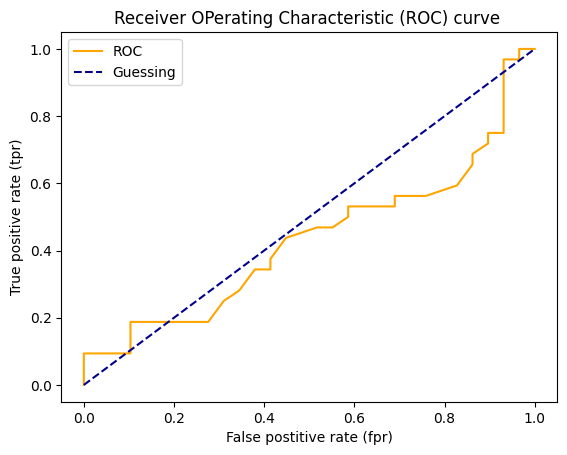

In [107]:
# Create a function for pltting ROC curve

import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    """
    Plots a ROC curve given the false positive rate (fpr)
    and true positive rate (tpr) of a model.
    """
    
    # Plot roc curve 
    plt.plot(fpr, tpr, color="orange", label="ROC")
    #Plot line woith no predictive power(baseline)
    plt.plot([0,1], [0,1], color="darkblue", linestyle="--", label="Guessing")
    
    # Customize the plot
    plt.xlabel("False postitive rate (fpr)")
    plt.ylabel("True positive rate (tpr)")
    plt.title("Receiver OPerating Characteristic (ROC) curve ")
    plt.legend()
    plt.show()
    
plot_roc_curve(fpr, tpr)    

In [108]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_probs_positive)

0.4326508620689655

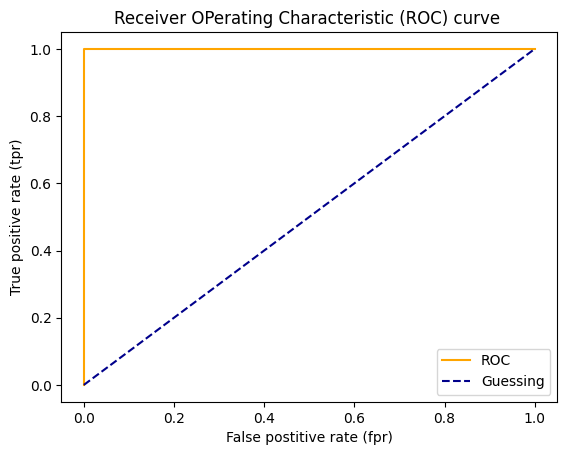

In [109]:
# PLot perfect ROC curve and AUC score

fpr, tpr, thresholds=roc_curve(y_test, y_test)
plot_roc_curve(fpr, tpr)

In [110]:
# Perfect AUC score 

roc_auc_score(y_test, y_test)

1.0

** Confusion Matrix**
 A confusion matrix is a quick way to compare the labels a model predicts and the actual labels it was supposed to predict.
    
   in essense , gig=ving you an idea of where the model is getting confused. 

In [111]:
from sklearn.metrics import confusion_matrix

y_preds=clf.predict(x_test)

confusion_matrix(y_test, y_preds)

array([[ 9, 20],
       [14, 18]], dtype=int64)

In [112]:
# Visualize confusion matrix with pd.crosstab()

pd.crosstab(y_test,
           y_preds,
           rownames=["Actusl Labels"],
           colnames=["Predicted Labels"])

Predicted Labels,0,1
Actusl Labels,,
0,9,20
1,14,18


<AxesSubplot: >

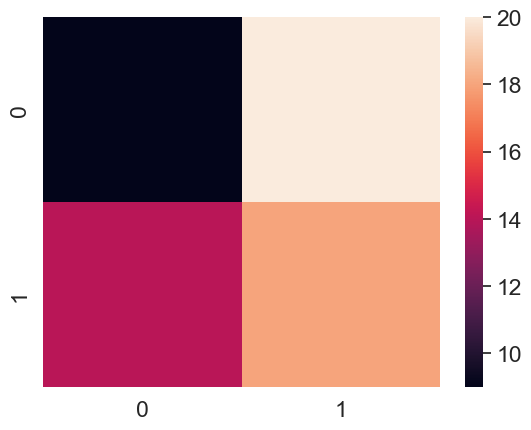

In [113]:
# Make our confusion matrix more visual Seaborn's heatmap()

import seaborn as sns


# Set the font scale
sns.set(font_scale=1.5)

#Create a confusion matrix
conf_mat=confusion_matrix(y_test, y_preds)

#Plot it using seaborn
sns.heatmap(conf_mat)
    
    

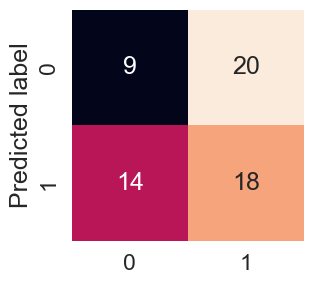

In [114]:
def plot_conf_mat(conf_mat):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    
    fig, ax=plt.subplots(figsize=(3,3))
    ax=sns.heatmap(conf_mat,
                   annot=True, # Annotate the boxes with conf_mat info)
                   cbar=False)
    plt.xlabel=("True label")
    plt.ylabel("Predicted label");
    
plot_conf_mat(conf_mat)    

## Classification Report

In [115]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_preds ))

              precision    recall  f1-score   support

           0       0.39      0.31      0.35        29
           1       0.47      0.56      0.51        32

    accuracy                           0.44        61
   macro avg       0.43      0.44      0.43        61
weighted avg       0.43      0.44      0.43        61



In [116]:
# Where precision and recall become valuable

disease_true=np.zeros(10000)
disease_true[0]=1 #omly one positive case

disease_preds= np.zeros(10000) # Model predicts every case as 0

pd.DataFrame(classification_report(disease_true,
                                   disease_preds,
                                  output_dict=True))

,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


 ## 4.3 Using different metrics as Scikit-Learn function

In [117]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import train_test_split

np.random.seed(42)

x=heart_disease.drop("target", axis=1)
y=heart_disease["target"]

x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.2)

clf=RandomForestClassifier(n_estimators=100)
clf.fit(x_train, y_train)


# Make some prediction

y_preds=clf.predict(x_test)

# Evaluate the classifier

print("Classifier metrics in the test set")
print(f"Accuracy: {accuracy_score(y_test, y_preds)*100:.2f}%")
print(f"Precision: {precision_score(y_test, y_preds)}")
print(f"Recall: {recall_score(y_test, y_preds)}")
print(f"F1: {f1_score(y_test, y_preds)}")

Classifier metrics in the test set
Accuracy: 85.25%
Precision: 0.8484848484848485
Recall: 0.875
F1: 0.8615384615384615


## 5. Improving a model 

First prediction = baseline predictions.
first model= baseline model.


from a data perspective:
* Could we collect more data?(generally, the more data , the better)
* Could we improve our data?


From a model perspective:
* Is there a better model we could use?
* Could we improve the current model?


Hyperparameters vs Parameters  
* Parameter = model find this pattern in data
* Hyperparameters= setting on a model you can adjust to (potentially) improve its ability to find patterns


Three ways to adjust the hyperparameter
1. By hand
2. Randomly with RandomSearchCV
3. Exhaustively with GridSearchCV

In [118]:
from sklearn.ensemble import RandomForestClassifier

clf=RandomForestClassifier()

In [119]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

###  5.1 Tunnig hyperparameters by hand

Let's make 3 sets, training ,validation, test.


In [120]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

We're going to try and adjust:

* `max_depth`
* `max_features`
* `min_sample_leaf`
* `min_sample_split`
* `n_estimator`

In [121]:
def evaluate_preds(y_true, y_preds):
    """
    Performs evaluation comparison on y_true labels vs. y_pred labels
    """
    
    accuracy= accuracy_score(y_true, y_preds)
    precision= precision_score(y_true, y_preds)
    recall=recall_score(y_true,y_preds)
    f1=f1_score(y_true,y_preds)
    metric_dict={"accuracy": round(accuracy,2),
                 "precision": round(precision, 2),
                 "recall" : round(recall, 2),
                  "f1"     : round(f1,2)}
    print(f"Acc:{accuracy * 100:.2f}%")
    print(f"Pricision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 score:{f1:.2f}")
    
    return metric_dict

In [122]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)


# Shuffle the data
heart_disease_shuffled= heart_disease.sample(frac=1)

# Split into x & Y
x=heart_disease_shuffled.drop("target", axis=1)
y=heart_disease_shuffled["target"]

# Split the data into train, validation & test sets
train_split=round(0.7 * len(heart_disease_shuffled)) # 70% of data
valid_split=round(train_split + 0.15 * len(heart_disease_shuffled)) # 15% of data
x_train, y_train=x[:train_split], y[:train_split]
x_valid, y_valid=x[train_split:valid_split], y[train_split:valid_split]
x_test, y_test= x[valid_split:], y[valid_split:]

len(x_train), len(x_valid), len(x_test)

clf=RandomForestClassifier()
clf.fit(x_train, y_train)

#Make baseline predictions
y_preds=clf.predict(x_valid)

# Evaluate the classifier on validation set

baseline_metrics=evaluate_preds(y_valid, y_preds)
baseline_metrics

Acc:82.22%
Pricision: 0.81
Recall: 0.88
F1 score:0.85


{'accuracy': 0.82, 'precision': 0.81, 'recall': 0.88, 'f1': 0.85}

In [123]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [124]:
np.random.seed(42)

# Create a second classifier with different hyperparameters

clf_2=RandomForestClassifier(n_estimators=100)
clf_2.fit(x_train, y_train)


# Make prediction wtih different hyperparameters
y_preds_2=clf_2.predict(x_valid)

# Evalute the 2nd classifier
clf_2_metrics= evaluate_preds(y_valid, y_preds_2)

Acc:82.22%
Pricision: 0.84
Recall: 0.84
F1 score:0.84


## 5.2 Hyperparameter tuning with RandomizedSearchCV


In [125]:
from sklearn.model_selection import RandomizedSearchCV

grid={"n_estimators": [10,100,200,500,1000,12000],
      "max_depth": [None, 5,10,20,30],
      "max_features" : ["auto","sqrt"],
      "min_samples_split" : [2, 4, 6],
      "min_samples_leaf": [1, 2, 4]}

np.random.seed(42)

# Split into x & y
x=heart_disease_shuffled.drop("target", axis=1)
y=heart_disease_shuffled["target"]

# Split into train and test sets
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.2)

# Instantiate RandomFirestClassifier
clf=RandomForestClassifier(n_jobs=1)

# Setup RandomizedSearchCV
rs_clf=RandomizedSearchCV(estimator=clf,
                          param_distributions=grid,
                          n_iter=10, # number of models to try
                          cv=5,
                          verbose=2)

# Fit the RandomizedSearchCV version of clf
rs_clf.fit(x_train, y_train);

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=12000; total time=  46.4s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=12000; total time=  46.9s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=12000; total time=  47.3s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=12000; total time=  47.2s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=12000; total time=  46.9s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.3s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.3s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimator

In [126]:
rs_clf.best_params_

{'n_estimators': 100,
 'min_samples_split': 6,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [127]:
# Make prediction with the best hyperparameters
rs_y_preds= rs_clf.predict(x_test)

# Evaluate the predictions
rs_metrics=evaluate_preds(y_test, rs_y_preds)

Acc:80.33%
Pricision: 0.74
Recall: 0.89
F1 score:0.81


## 5.3 HyperParameter tuning with GridSearchCv


In [128]:
grid

{'n_estimators': [10, 100, 200, 500, 1000, 12000],
 'max_depth': [None, 5, 10, 20, 30],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [2, 4, 6],
 'min_samples_leaf': [1, 2, 4]}

In [129]:
grid_2={'n_estimators': [ 100, 200, 500],
        'max_depth': [20],
        'max_features': ['auto', 'sqrt'],
        'min_samples_split': [1],
        'min_samples_leaf': [1, 2]}

In [ ]:
from sklearn.model_selection import GridSearchCV, train_test_split

np.random.seed(42)

# Split into x & y
x=heart_disease_shuffled.drop("target", axis=1)
y=heart_disease_shuffled["target"]

# Split into train and test sets
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.2)

# Instantiate RandomFirestClassifier
clf=RandomForestClassifier(n_jobs=1)

# SetupvgirdSearchCV
gs_clf=GridSearchCV(estimator=clf,
                          param_grid=grid_2,
                          cv=5,
                          verbose=2)

# Fit the GridSearchCV version of clf
gs_clf.fit(x_train, y_train);

In [ ]:
gs_clf.best_params_

In [ ]:
gs_y_preds=gs_clf.predict(x_test)


#Evaluate the predictions
gs_metrics=evaluate_preds(y_test, gs_y_preds)

Let's compare our different models metrics


In [ ]:
compare_metrics=pd.DataFrame({"baseline": baseline_metrics,
                             "clf_2": clf_2_metrics,
                             "random search" : rs_metrics,
                             "grid search" : gs_metrics})
                              

compare_metrics.plot.bar(figsize=(10,8));

## 6. Saving and loading trained machine learning models

Two ways to save and load machine learning models:
1. With Python's `pickle` module
2.with the `joblib` module

**Pickle**

In [ ]:
import pickle

# Save an extising model to file

pickle.dump(gs_clf, open("gs_random_random_forest_model_1.pkl", "wb"))

In [ ]:
# Load a saved model

loaded_pickle_model=pickle.load(open("gs_random_random_forest_model_1.pkl", "rb"))

In [ ]:
# Make some presictions

pickle_y_preds= loaded_pickle_model.predict(x_test)
evaluate_preds(y_test,pickle_y_preds)

**Joblib**

In [ ]:
from joblib import dump, load

# Save model to file
dump(gs_clf, filename="gs_random_forest_model_1.joblib")

In [ ]:
# Import a saved joblib model 
loaded_joblib_model=load(filename="gs_random_forest_model_1.joblib")

In [ ]:
# Make and evaluate joblib model 

joblib_y_preds=loaded_joblib_model.predict(x_test)
evaluate_preds(y_test, joblib_y_preds)

## 7.Puting all together!

In [ ]:
data=pd.read_csv("csv/car-sales-extended-missing-data.csv")
data

In [ ]:
data.dtypes

In [ ]:
data.isna().sum()

Steps we want to do (all in one cell):
1. Fill missing data
2.Convert data to numbers
3.Build a model on the data

In [ ]:
# Getting data ready
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder


# Modeling
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV

# Setup random seed
import numpy as np
np.random.seed(42)

# Import data and drop rows with missing labels
data=pd.read_csv("csv/car-sales-extended-missing-data.csv")
data.dropna(subset=["Price"], inplace=True)

#Define different features and trasnformer pipeline
categorical_features=["Make", "Colour"]
categorical_transformer=Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value="missing")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))])

door_feature=["Doors"]
door_transformer=Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value=4))
])

numerical_features=["Odometer (KM)"]
numerical_transformer=Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean"))
])

# Setup the preprocessing steps(fill missing values, then convert to numbers)
preprocessor= ColumnTransformer(
                    transformers=[
                        ("cat", categorical_transformer, categorical_features),
                        ("door", door_transformer, door_feature),
                        ("num" , numerical_transformer, numerical_features)
                    ])

# Creating a preprocessing and modelling pipeline
model=Pipeline(steps=[("preprocessor", preprocessor),
                      ("model",RandomForestRegressor())])

# Split data
x=data.drop("Price", axis=1)
y=data["Price"]
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2)

# Fit and score the model
model.fit(x_train, y_train)
model.score(x_test, y_test)

It's also possible to use `GridSearchCV` or `RandomizedSearchCV` with our Pipeline

In [ ]:
# Use GridSearchCv woth our regression Pipeline
from sklearn.model_selection import GridSearchCV

pipe_grid={
    "preprocessor__num__imputer_strategy":["mean", "median"],
    "model__n_estimators":[100,1000],
    "model__max_depth":[None, 5],
    "model__max_features": ["auto"],
    "model__min_samples_split": [2,4]
}

gs_model=GridSearchCV(model, pipe_grid, cv=5, verbose=2)
gs_model.fit(x_train, y_train)

In [ ]:
gs_model.score(x_test, y_test)